We will repeat the EDA, but use a data set that has grouped the countries of origin into larger regions to see if we can distinguish any stronger clusters.

# Train Test Split

In [1]:
import pandas as pd
import numpy as np

In [2]:
#we will initially work with the non-imputed, smaller data set
coffee = pd.read_csv('../data/coffee_grouped.csv')

In [3]:
coffee.head()

,Country_of_Origin,Processing_Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,East Africa,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,1950.0,2200.0,2075.0
1,East Africa,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,1950.0,2200.0,2075.0
2,Central America,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,1600.0,1800.0,1700.0
3,East Africa,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,1800.0,2200.0,2000.0
4,East Africa,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,1950.0,2200.0,2075.0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
coffee.Country_of_Origin.value_counts()

Central America           331
Mexico                    236
NW South America          193
East Africa               146
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Thailand                   32
Indonesia                  20
China                      16
Name: Country_of_Origin, dtype: int64

In [6]:
## Make the split
coffee_train, coffee_test = train_test_split(coffee.copy(),
                                            shuffle=True,
                                            random_state=47,
                                            test_size = .2,
                                            stratify=coffee['Country_of_Origin'])

In [7]:
coffee_test.Country_of_Origin.value_counts()

Central America           66
Mexico                    47
NW South America          39
East Africa               29
Brazil                    27
United States (Hawaii)    15
Taiwan                    15
Thailand                   6
Indonesia                  4
China                      3
Name: Country_of_Origin, dtype: int64

In [8]:
## import some additional packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

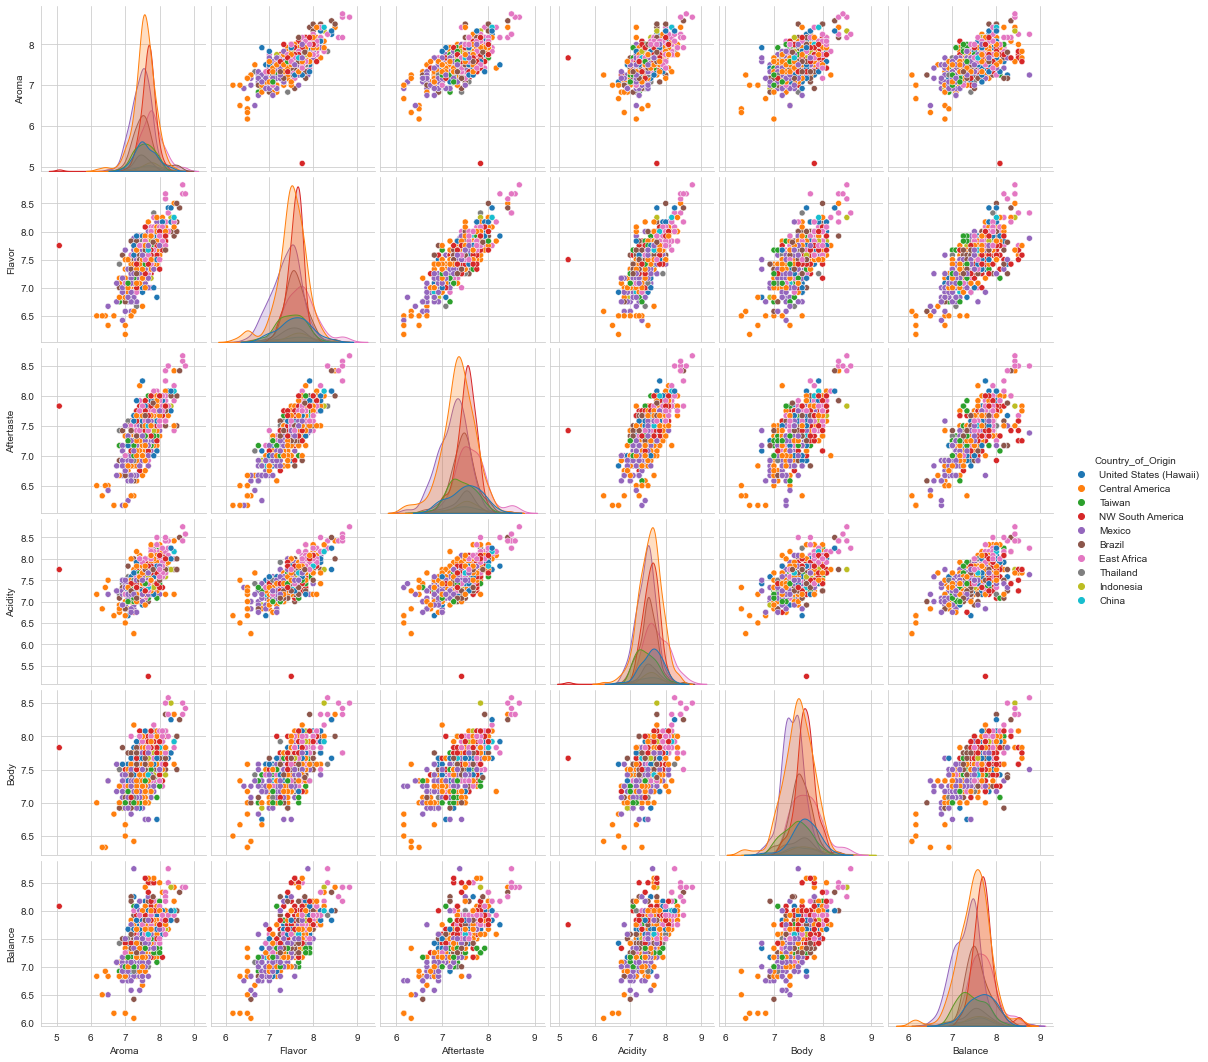

In [9]:
## Again, make a pairplot to look at relationships between ratings and how they relate to the country of origin
sns.pairplot(coffee_train, vars = ["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance"],  hue = "Country_of_Origin")

## Summary
Unfortunately, we still don't see any clear separation between the regions. There is a large amount of overlap in the measures between the different regions, so our algorithms will likely struggle to correctly classify the region.